# PSyKE's demo for regression tasks

Some imports.

In [8]:
from psyke import Extractor
from psyke.regression import Grid, FeatureRanker
from psyke.optimizer.pedro import PEDRO
from psyke.optimizer.crash import CRASH
from sklearn.neighbors import KNeighborsRegressor
from psyke.utils.logic import pretty_theory
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd

Import an artificial dataset.

In [9]:
dataset = pd.read_csv("test/resources/datasets/df.csv")
#dataset = pd.read_csv("test/resources/datasets/CCPP.csv", sep=";", decimal=",")
#dataset

Split between train and test set in a reproducible way.

In [10]:
dataset = dataset[["X", "Y", "Z3"]].dropna()
train, test = train_test_split(dataset, test_size=0.5, random_state=10)

We use as predictor a KNN and we train it.

In [11]:
predictor = KNeighborsRegressor(n_neighbors=3).fit(train.iloc[:, :-1], train.iloc[:, -1])

print((abs(predictor.predict(test.iloc[:, :-1]).flatten() - test.iloc[:, -1])).mean())

0.05592702327567807


We create several extractors that use ITER, GridEx and GridREx algorithms to extract prolog rules from the predictor.

Algorithm.CReEPy. Depth: 1. Threshold = 0.04. MAE = 0.57, 2 rules
Algorithm.CReEPy. Depth: 1. Threshold = 0.06. MAE = 0.57, 2 rules
Algorithm.CReEPy. Depth: 1. Threshold = 0.57. MAE = 0.57, 2 rules

Algorithm.CReEPy. Depth: 2. Threshold = 0.04. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 2. Threshold = 0.06. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 2. Threshold = 0.40. MAE = 0.40, 3 rules

Algorithm.CReEPy. Depth: 3. Threshold = 0.04. MAE = 0.40, 4 rules
Algorithm.CReEPy. Depth: 3. Threshold = 0.06. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 3. Threshold = 0.08. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 3. Threshold = 0.40. MAE = 0.40, 3 rules

Algorithm.CReEPy. Depth: 4. Threshold = 0.04. MAE = 0.40, 5 rules
Algorithm.CReEPy. Depth: 4. Threshold = 0.06. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 4. Threshold = 0.08. MAE = 0.40, 3 rules
Algorithm.CReEPy. Depth: 4. Threshold = 0.40. MAE = 0.40, 3 rules

Algorithm.CReEPy. Depth: 5. Threshold = 0.04. MAE = 0.40, 6 rules
Algori

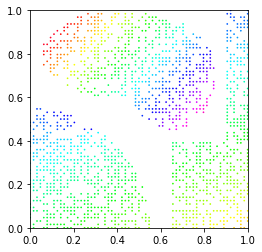

In [12]:
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#plt.ylim((0, 1))
#ax1.scatter(test.X, test.Y, c=test.iloc[:, -1], s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
#ax1.set_xlim((0, 1))
#ax1.set_aspect("equal")
#ax2.scatter(test.X, test.Y, c=predictor.predict(test.iloc[:, :-1]), s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
#ax2.set_xlim((0, 1))
#ax2.set_aspect("equal")
#plt.show()

crash = CRASH(predictor, train, max_depth=5, patience=2, readability_tradeoff=.5, algorithm=CRASH.Algorithm.CReEPy)
crash.search()
(_, _, depth, threshold) = crash.get_best()[0]

creepy = Extractor.creepy(predictor, depth=depth, error_threshold=threshold, constant=False)
theory_from_creepy = creepy.extract(train)
print('CReEPy performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(creepy.n_rules, creepy.mae(test), creepy.mae(test, predictor)))
#print('ITER extracted rules:\n\n' + pretty_theory(theory_from_cream))

plt.scatter(test.X, test.Y, c=creepy.predict(test.iloc[:, :-1]), s=0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.gca().set_aspect("equal")
plt.show()

Algorithm.CREAM. Depth: 1. Threshold = 0.04. MAE = 0.57, 2 rules
Algorithm.CREAM. Depth: 1. Threshold = 0.06. MAE = 0.57, 2 rules
Algorithm.CREAM. Depth: 1. Threshold = 0.57. MAE = 0.57, 2 rules

Algorithm.CREAM. Depth: 2. Threshold = 0.04. MAE = 0.04, 4 rules
Algorithm.CREAM. Depth: 2. Threshold = 0.06. MAE = 0.04, 4 rules
Algorithm.CREAM. Depth: 2. Threshold = 0.08. MAE = 0.04, 4 rules

**********************
*Best Algorithm.CREAM*
**********************
MAE = 0.04, 4 rules
Threshold = 0.04
Depth = 2

**********************
*Best   MAE  *
**********************
MAE = 0.04, 4 rules
Threshold = 0.04
Depth = 2

**********************
*Best N rules*
**********************
MAE = 0.57, 2 rules
Threshold = 0.04
Depth = 1

CREAM performance (4 rules):
MAE = 0.01
MAE fidelity = 0.06



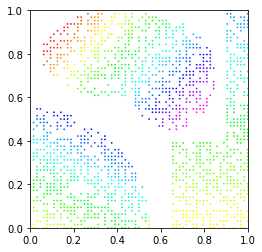

In [13]:
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#plt.ylim((0, 1))
#ax1.scatter(test.X, test.Y, c=test.iloc[:, -1], s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
#ax1.set_xlim((0, 1))
#ax1.set_aspect("equal")
#ax2.scatter(test.X, test.Y, c=predictor.predict(test.iloc[:, :-1]), s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
#ax2.set_xlim((0, 1))
#ax2.set_aspect("equal")
#plt.show()

crash = CRASH(predictor, train, max_depth=5, patience=2, readability_tradeoff=.75, algorithm=CRASH.Algorithm.CREAM)
crash.search()
(_, _, depth, threshold) = crash.get_best()[0]

cream = Extractor.cream(predictor, depth=depth, error_threshold=threshold, constant=False)
theory_from_cream = cream.extract(train)
print('CREAM performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(cream.n_rules, cream.mae(test), cream.mae(test, predictor)))
#print('ITER extracted rules:\n\n' + pretty_theory(theory_from_cream))

plt.scatter(test.X, test.Y, c = cream.predict(test.iloc[:, :-1]), s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.gca().set_aspect("equal")
plt.show()

In [14]:
xxxxxxx

NameError: name 'xxxxxxx' is not defined

In [ ]:
it = Extractor.iter(predictor, min_update=1.0 / 20, n_points=1, max_iterations=600,
                    min_examples=100, threshold=3)
theory_from_iter = it.extract(train)
print('ITER performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(it.n_rules, it.mae(test), it.mae(test, predictor)))
print('ITER extracted rules:\n\n' + pretty_theory(theory_from_iter))

In [ ]:
pedro = PEDRO(predictor, train, max_mae_increase=1.2, min_rule_decrease=0.9, readability_tradeoff=0.1,
              max_depth=5, patience=5, algorithm=PEDRO.Algorithm.GRIDEX, objective=PEDRO.Objective.MODEL)
pedro.search()
(_, _, threshold, grid) = pedro.get_best()

ranked = FeatureRanker(dataset.columns[:-1]).fit(predictor, dataset.iloc[:, :-1]).rankings()
gridEx = Extractor.gridex(predictor, grid, threshold=threshold)
theory_from_gridEx = gridEx.extract(train)
print('GridEx performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(gridEx.n_rules, gridEx.mae(test), gridEx.mae(test, predictor)))
print('GridEx extracted rules:\n\n' + pretty_theory(theory_from_gridEx))

In [ ]:
pedro = PEDRO(predictor, train, max_mae_increase=1.2, min_rule_decrease=0.9, readability_tradeoff=0.1,
              max_depth=5, patience=5, algorithm=PEDRO.Algorithm.GRIDREX, objective=PEDRO.Objective.MODEL)
pedro.search()
_ = pedro.get_best()

In [ ]:
ranked = FeatureRanker(dataset.columns[:-1]).fit(predictor, dataset.iloc[:, :-1]).rankings()
gridREx = Extractor.gridrex(predictor, Grid(1, AdaptiveStrategy(ranked, [(0.99, 5)])), threshold=0.01)
theory_from_gridREx = gridREx.extract(train)
print('GridREx performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(gridREx.n_rules, gridREx.mae(test), gridREx.mae(test, predictor)))
print('GridREx extracted rules:\n\n' + pretty_theory(theory_from_gridREx))